In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [3]:
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str
    

In [4]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = bmi
    return state


In [5]:
def define_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
    state['category'] = category
    return state


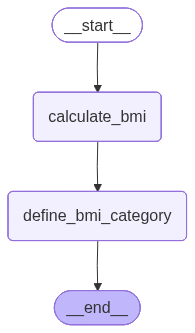

In [9]:
#define you graph
bmi_graph = StateGraph(BMIState)

# Add Nodes
bmi_graph.add_node(calculate_bmi,'calculate_bmi')
bmi_graph.add_node(define_bmi_category,'define_bmi_category')

# Define edges
bmi_graph.add_edge(START,'calculate_bmi')
bmi_graph.add_edge('calculate_bmi','define_bmi_category')
bmi_graph.add_edge('define_bmi_category',END)

# Compile the graph
workflow=bmi_graph.compile()

workflow

In [11]:
# execute the graph
initial_state: BMIState = {'weight': 86, 'height': 1.79}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight': 86, 'height': 1.79, 'bmi': 26.840610467838083, 'category': 'Overweight'}
